#    ------------------------------------

<h2 style="color:blue;">DATA 3550 Fall 2023 Final Project</h2>
 
  * Professor Ramchandra Rimal
  * Nicholas Sartino (M00392300) 

#    ------------------------------------

Suppose you are an employee of the insurance company. Your goal is to analyze and learn from the data and inform the management about the following:

1) The better way to predict the amount of a quote for insurance and the most important features that help to determine the quote

2) The better way to assess risk (because the goal of a company is to make a profit)

# Installs and Imports

## Installs

In [222]:
# !pip install scikit-learn
# !pip install geoplotlib
# !pip install missingno
# !pip install seaborn
# !pip install -U ydata-profiling

## Imports

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn import tree
from IPython.display import display, HTML

# For warnings
import warnings
%matplotlib inline

# For y-data reports
from ydata_profiling import ProfileReport

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)
sns.set_style('whitegrid')

# For confirming data location
import os

# Trick to widen the screen
display(HTML("<style>.container { width:95% !important; }</style>"))

In [224]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Loading and Data Transformation

In [225]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_directory)

Current Working Directory: /Users/nicksartino/Code/Final-Project-3550


## Abilitech

### Loading the Abilitech dataset 

In [226]:
# Load the Abilitech dataset

df_Abilitech = pd.read_csv('Dataset/df_AP02.csv', header=0)

### Exploratory Data Analysis

In [227]:
# Display the top 5 rows

df_Abilitech.head()

AbilitecContactID  ACX_ZIPCODE  ACX_ZIP4  \
0  04ZJUS11ZZY02CX2        37862       NaN   
1  04ZJUS11ZZX6Z5PH        42040    9553.0   
2  04ZJUS11ZZVK414Y        37814    5477.0   
3  04ZJUS11ZZV842QB        35613    1512.0   
4  04ZJUS11ZZTVWBDL        80216    1140.0   

   AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913  \
0                                                NaN                                                       
1                                               15.0                                                       
2                                                NaN                                                       
3                                                6.0                                                       
4                                                NaN                                                       

   AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916  \
0                                                NaN                                                 
1                                               13.0                                                 
2                                                NaN                                                 
3                                                4.0                                                 
4                                                NaN                                                 

   AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921  \
0                                                NaN                                     
1                                               14.0                                     
2                                                NaN                                     
3                                               11.0                                     
4                                                NaN                                     

   AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922  \
0                                                NaN                               
1                                               12.0                               
2                                                NaN                               
3                                               12.0                               
4                                                NaN                               

   AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923  \
0                                                NaN                                       
1                                               12.0                                       
2                                                NaN                                       
3                                               10.0                                       
4                                                NaN                                       

   AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924  \
0                                                NaN                                                   
1                                                9.0                                                   
2                                                NaN                                                   
3                                               13.0                                                   
4                                                NaN                                                   

   AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925  \
0                                                NaN                                 
1                                               16.0               

<Axes: >

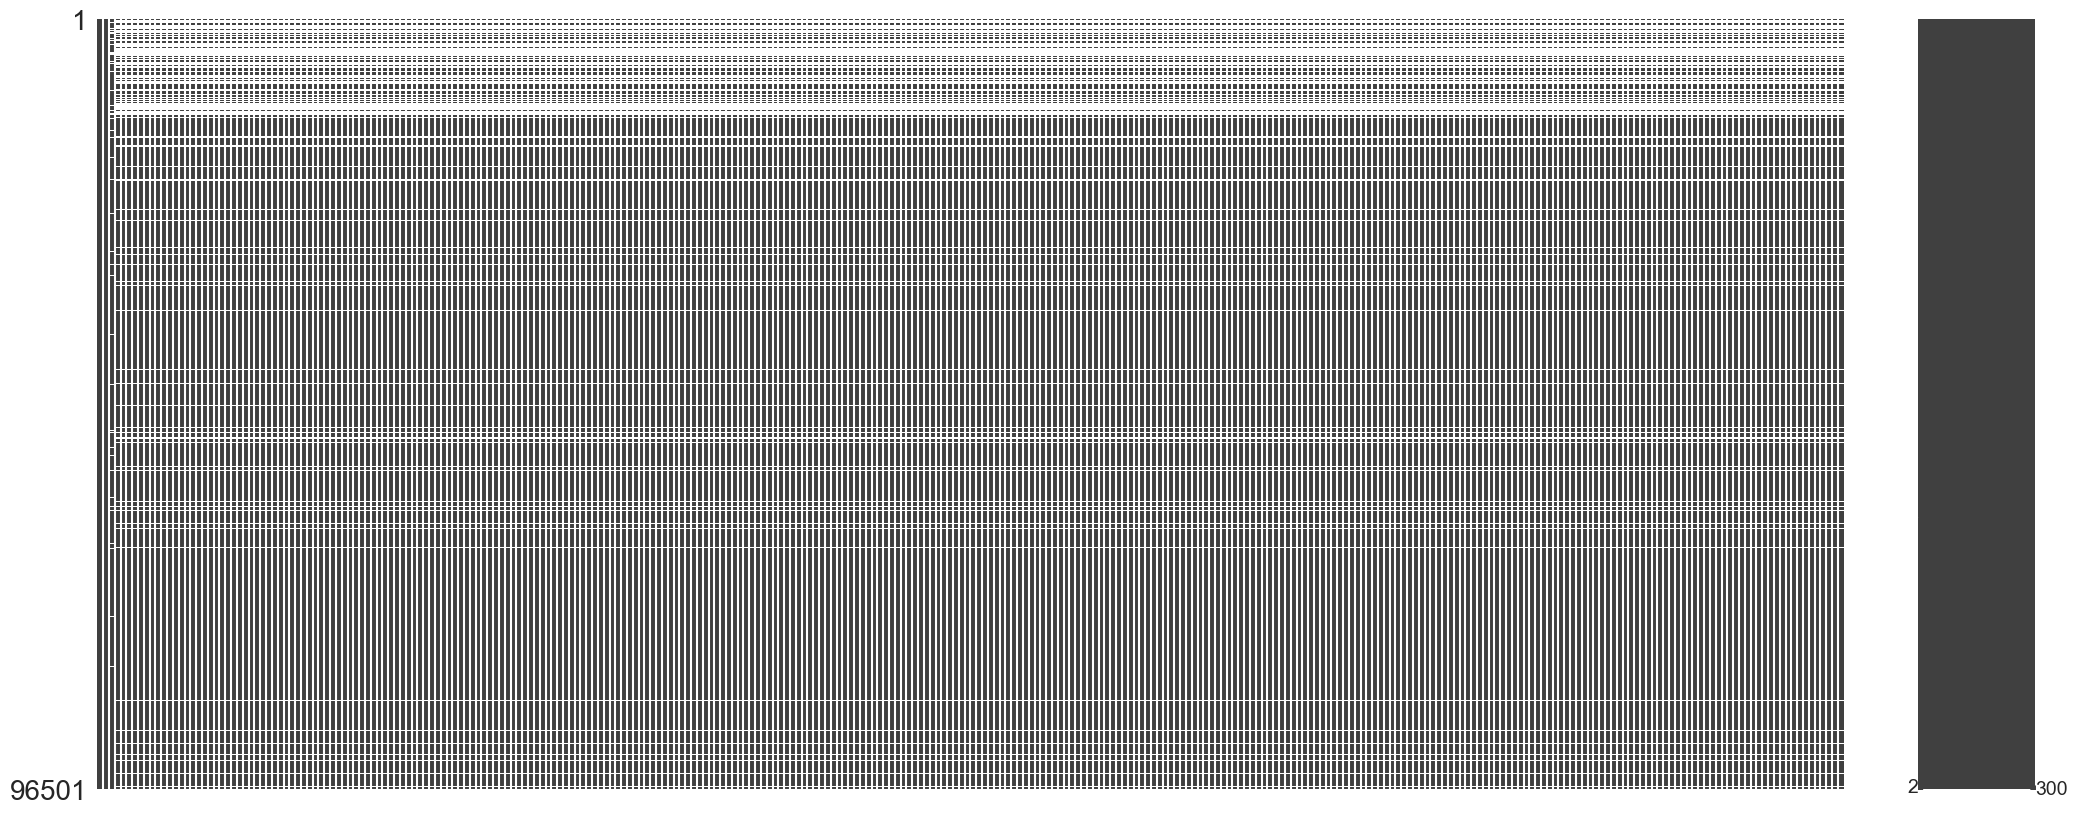

In [228]:
# Display the missing values

# Visualize missing values
msno.matrix(df_Abilitech)

### Data Preprocessing

In [229]:
# The Missing Value matrix shows many rows that are all missing value, so we'll remove those first

# Get a list of all columns in df_Abilitech
all_columns = df_Abilitech.columns.tolist()

# These are the columns we don't want to consider when dropping rows
exception_columns = ['AbilitecContactID', 'ACX_ZIPCODE', 'ACX_ZIP4']

# Get a list of columns to consider when dropping rows
columns_to_consider = [col for col in all_columns if col not in exception_columns]

# Drop rows that have all NaN in columns_to_consider
df_Abilitech = df_Abilitech.dropna(subset=columns_to_consider, how='all')

<Axes: >

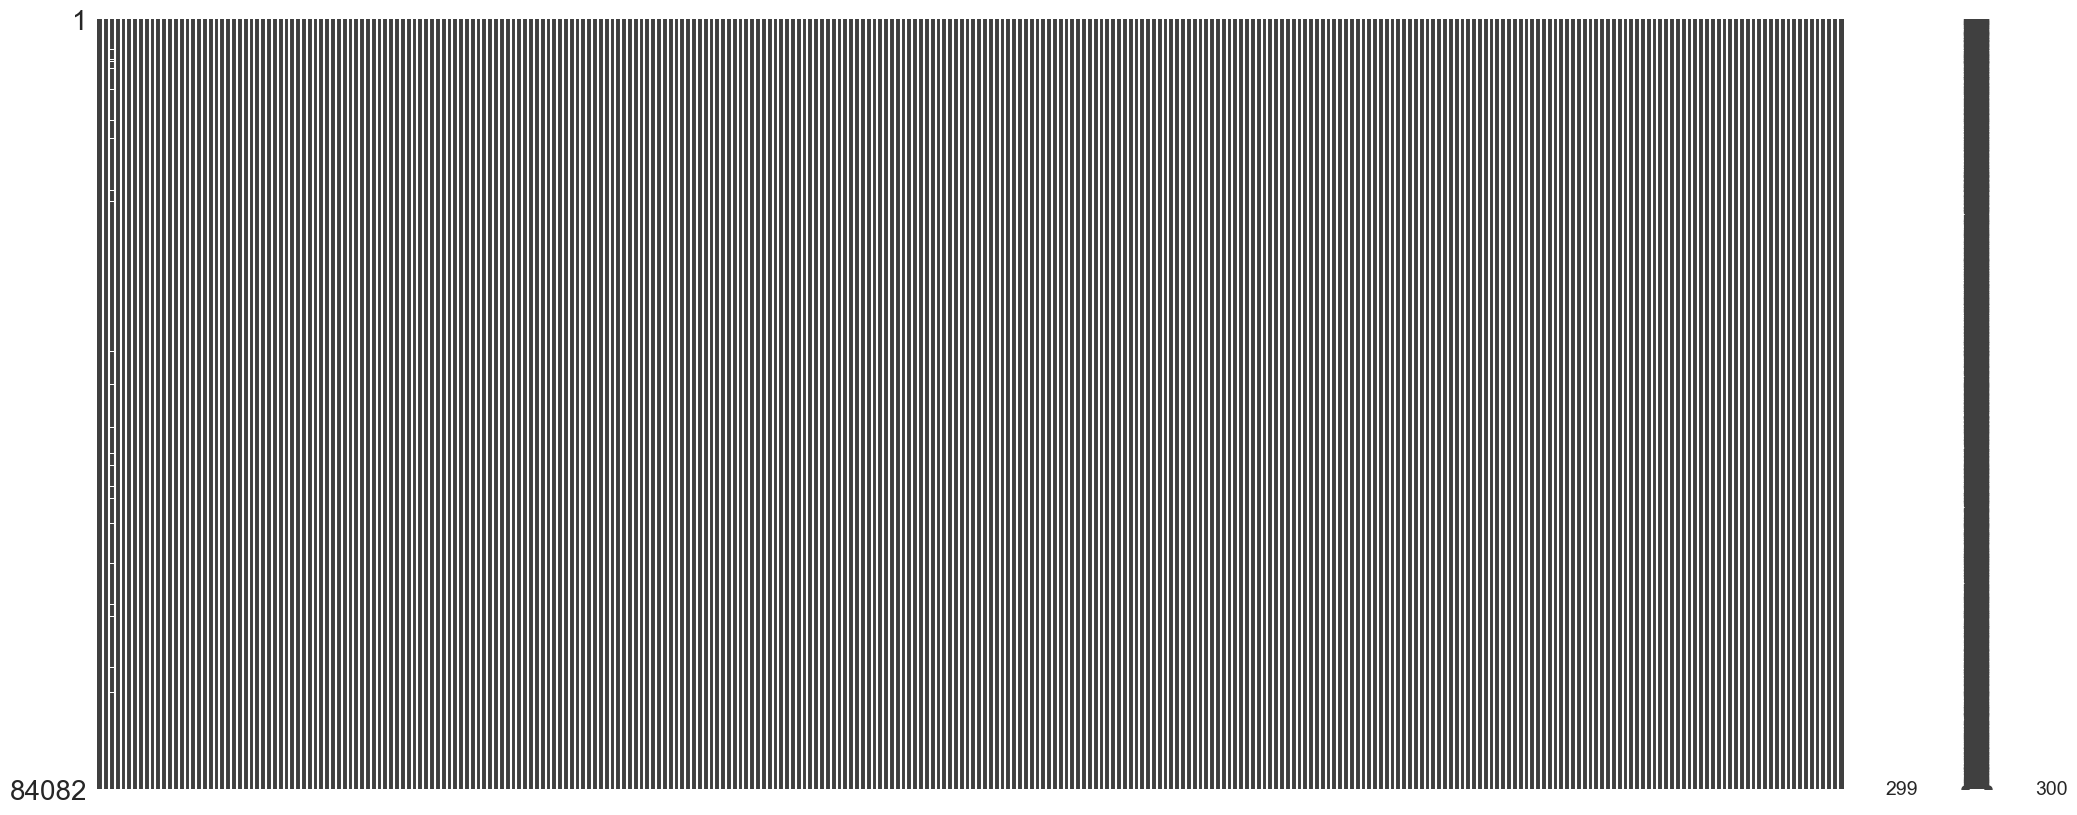

In [230]:
# Check the results

msno.matrix(df_Abilitech)

In [231]:
# Drop the second part of Zip-Code since it isn't filled and won't be used

df_Abilitech.drop(columns=['ACX_ZIP4'],inplace=True)

In [233]:
# Because Zip-Code is nominal, we shouldn't use label encoding
# This will check to see how many unique values exist because there are already 300 columns
# If there is a lot, we will drop the 'ACX_ZIPCODE' column 

num_unique_values = df_Abilitech['ACX_ZIPCODE'].nunique()
print(num_unique_values)

13554


In [234]:
# Way too many to add as dummies, so we'll drop the column instead.

df_Abilitech.drop(columns=['ACX_ZIPCODE'],inplace=True)

In [235]:
# Check for missing values in other columns

missing_values = df_Abilitech.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


In [236]:
# Check for duplicate AbilitecContactIDs

dup_counts = df_Abilitech['AbilitecContactID'].duplicated().sum()
print(f"There are {dup_counts} duplicate entries in the 'AbilitecContactID' column.")

There are 0 duplicate entries in the 'AbilitecContactID' column.


In [ ]:
# Set AbilitecContactID as the Index

# df_Abilitech.set_index('AbilitecContactID', inplace=True)

In [237]:
# Inspect the finished data frame

df_Abilitech.head()

AbilitecContactID  \
1   04ZJUS11ZZX6Z5PH   
3   04ZJUS11ZZV842QB   
6   04ZJUS11ZZT1XXYJ   
9   04ZJUS11ZZPV93BL   
10  04ZJUS11ZZPDGK4D   

    AP004913_Average_Monthly_Expenditure_For_Credit_Cards_Was_Greater_Than_2001_Fin_rank_base_20_AP004913  \
1                                                15.0                                                       
3                                                 6.0                                                       
6                                                13.0                                                       
9                                                11.0                                                       
10                                               14.0                                                       

    AP004916_Have_An_Average_Monthly_Debit_Card_Expenditure_Of_181_To_225_Fin_rank_base_20_AP004916  \
1                                                13.0                                                 
3                                                 4.0                                                 
6                                                 8.0                                                 
9                                                15.0                                                 
10                                               18.0                                                 

    AP004921_Never_Or_Rarely_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004921  \
1                                                14.0                                     
3                                                11.0                                     
6                                                16.0                                     
9                                                19.0                                     
10                                               18.0                                     

    AP004922_Sometimes_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004922  \
1                                                12.0                               
3                                                12.0                               
6                                                14.0                               
9                                                19.0                               
10                                               19.0                               

    AP004923_Usually_Or_Always_Carry_A_Balance_On_A_Credit_Card_Fin_rank_base_20_AP004923  \
1                                                12.0                                       
3                                                10.0                                       
6                                                11.0                                       
9                                                18.0                                       
10                                               17.0                                       

    AP004924_Have_Accepted_Pre_Approved_Credit_Card_Offer_In_Past_12_Months_Fin_rank_base_20_AP004924  \
1                                                 9.0                                                   
3                                                13.0                                                   
6                                                10.0                                                   
9                                                18.0                                                   
10                                               16.0                                                   

    AP004925_Have_Used_Credit_Cards_For_Business_Purposes_Fin_rank_base_20_AP004925  \
1                                                16.0                                 
3                                                 6.0                                 
6                                                12.0                      

## MasterQuote

### Loading the MasterQuote dataset

In [238]:
# Read in data 
# Make sure the directory from the above Get Current Working Directory code is included below
df_MasterQuote = pd.read_csv('Dataset/MasterQuote.csv', header = 0)

### Exploratory Data Analysis

In [239]:
profile = ProfileReport(df_MasterQuote, title="Pandas Profiling Report")

In [240]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

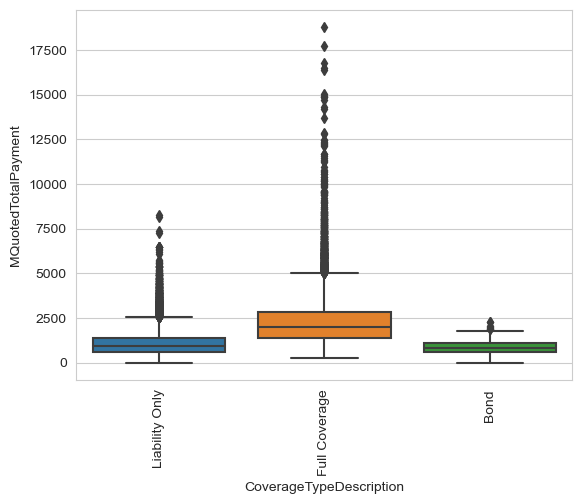

In [241]:
ax = sns.boxplot(x='CoverageTypeDescription',y='MQuotedTotalPayment', data=df_MasterQuote)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

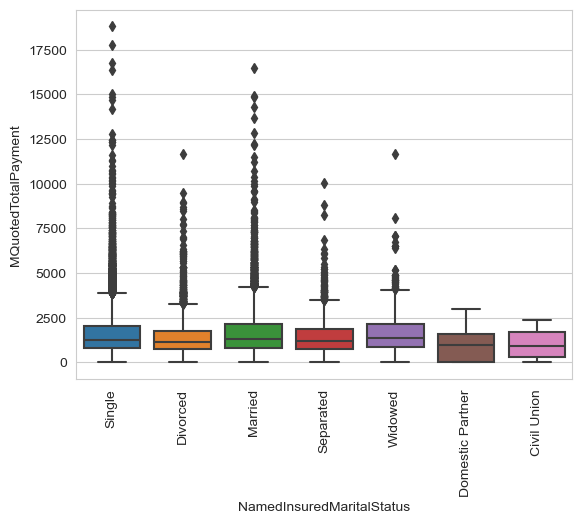

In [242]:
ax = sns.boxplot(x='NamedInsuredMaritalStatus',y='MQuotedTotalPayment', data=df_MasterQuote)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

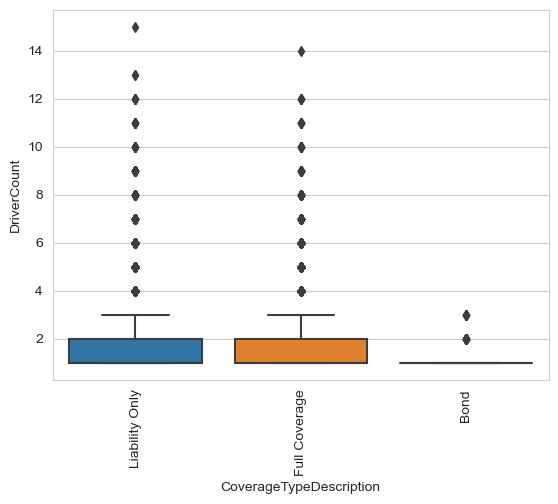

In [243]:
ax = sns.boxplot(x='CoverageTypeDescription',y='DriverCount', data=df_MasterQuote)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Data Preprocessing

<Axes: >

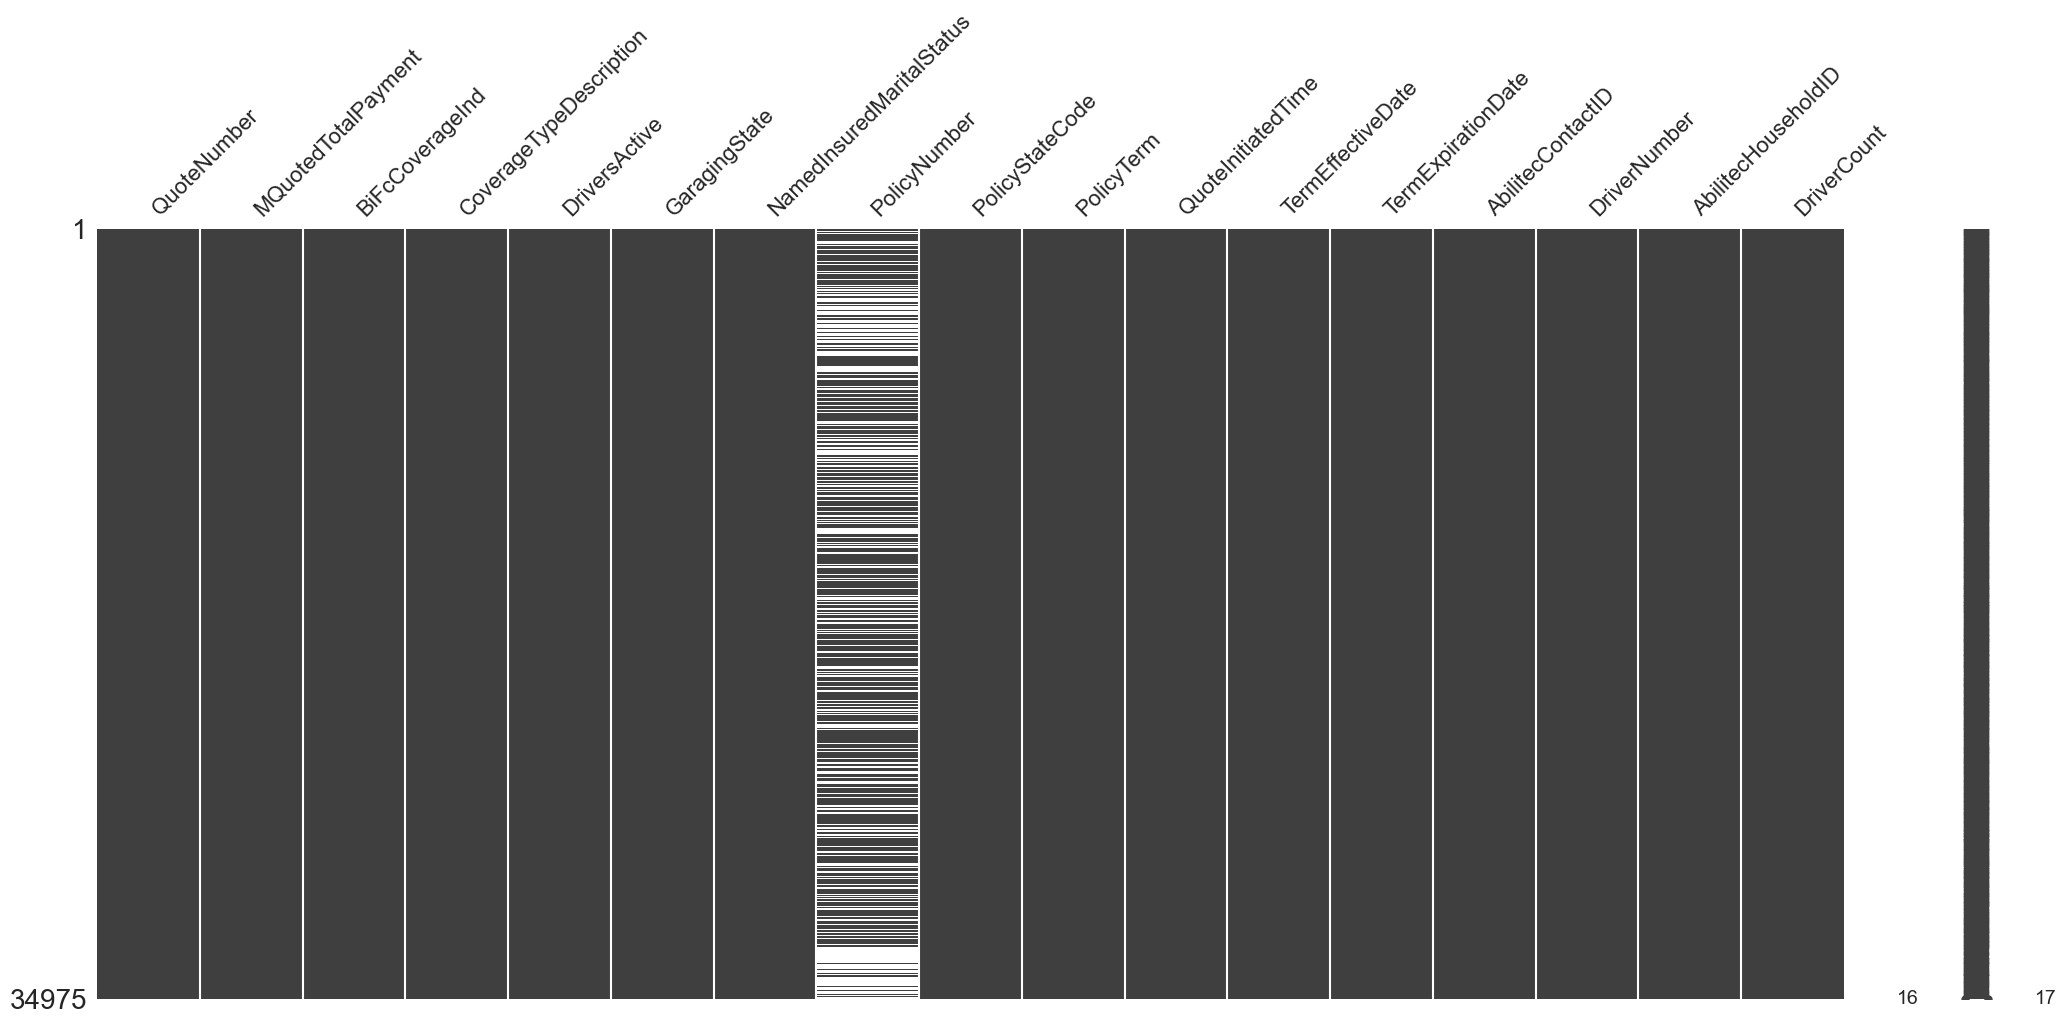

In [244]:
# Display the missing values

# Visualize missing values
msno.matrix(df_MasterQuote)

In [245]:
# Policy number has 39% NaN values
# Assuming these are quotes for non-customers, we will create a categorical variable for customer/non-customer

df_MasterQuote['IsCustomer?'] = (~df_MasterQuote['PolicyNumber'].isna()).astype(int)

In [246]:
# Check for other missing values

missing_values = df_MasterQuote.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

PolicyNumber    13862
dtype: int64


In [ ]:
# Check the unique values for 'BiFcCoverageInd'

unique_values = df_MasterQuote['BiFcCoverageInd'].unique()
print(unique_values)

In [ ]:
# 'NOBI NOFC' all have a MQuotedTotalPayment = $0.
# These can be considered meaningless since they are promotions, employee discounts, etc.

df_MasterQuote = df_MasterQuote.loc[df_MasterQuote['BiFcCoverageInd'] != 'NOBI NOFC']

In [ ]:
# Check the unique values for 'CoverageTypeDescription'

unique_values = df_MasterQuote['CoverageTypeDescription'].unique()
print(unique_values)

In [ ]:
# Get dummies for 'CoverageTypeDescription' and 'NamedInsuredMaritalStatus'
df_MasterQuote = pd.get_dummies(df_MasterQuote, columns=['CoverageTypeDescription', 'NamedInsuredMaritalStatus'], drop_first=True,dummy_na=True)

In [ ]:
# Check for duplicate QuoteNumbers

dup_counts = df_MasterQuote['QuoteNumber'].duplicated().sum()
print(f"There are {dup_counts} duplicate entries in the 'QuoteNumber' column.")

In [ ]:
# Set QuoteNumber as the Index

df_MasterQuote.set_index('QuoteNumber', inplace=True)

In [ ]:
# Preview the pre-merged, pre-proccessed data frame

df_MasterQuote.head()

In [ ]:
# Merge to Abilitec

# Convert 'AbilitecContactID' to the same data type in MasterQuote

df_MasterQuote['AbilitecContactID'] = df_MasterQuote['AbilitecContactID'].astype(str)

merged_MQ_df = pd.merge(df_MasterQuote, df_Abilitech, on='AbilitecContactID', how='left')

df_MasterQuote = merged_MQ_df.copy()

In [ ]:
# Preview merged data frame

df_MasterQuote.head()

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['AbilitecHouseholdID', 'GaragingState','PolicyStateCode','BiFcCoverageInd', 'PolicyNumber', 'QuoteInitiatedTime', 'TermEffectiveDate', 'TermExpirationDate','CoverageTypeDescription_nan','NamedInsuredMaritalStatus_nan','DriverNumber','AbilitecContactID']
df_MasterQuote.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Identify boolean columns
bool_columns = df_MasterQuote.select_dtypes(include=bool).columns

# Convert boolean columns to 0/1
df_MasterQuote[bool_columns] = df_MasterQuote[bool_columns].astype(int)

In [ ]:
# Preview the resulting data frame

df_MasterQuote.head()

In [ ]:
# Visualize the Top-20 predictors for 'MQuotedTotalPayment'

numeric_columns = df_MasterQuote.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Select the target column for correlation analysis
target_column = 'MQuotedTotalPayment'

# Get the top 20 correlated features with the target column
top_corr_features = corr_matrix[target_column].sort_values(ascending=False).head(21)[
                    1:]  # Exclude the target column itself

# Display the top 20 correlated features
print("Top predictors for", target_column)
print(top_corr_features)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Get the z-scores to identify outliers

z_scores = zscore(df_MasterQuote['MQuotedTotalPayment'])

# Define a Z-score threshold (e.g., 3)
threshold = 3

# Create a new DataFrame without outliers
df_no_outliers = df_MasterQuote[(z_scores < threshold) & (z_scores > -threshold)]

In [ ]:
# Preview the results

df_no_outliers.head()

In [ ]:
# Check to see if NaN rows exist after merge

missing_values = df_no_outliers.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

In [ ]:
# Preview NaN rows from Abilitech

df_no_outliers[df_no_outliers.isnull().any(axis=1)].head(10)

In [ ]:
# Replace Nan with mean values

df_no_outliers = df_no_outliers.fillna(df_no_outliers.mean())

In [ ]:
# Check to see if NaN rows exist after filling with mean

missing_values = df_no_outliers.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

In [ ]:
# Check for $0 MQuotedTotalPayment

count = (df_no_outliers['MQuotedTotalPayment'] == 0).sum()
print(count)

In [ ]:
# Drop $0 MQuotedTotalPayment

df_no_outliers = df_no_outliers[df_no_outliers['MQuotedTotalPayment'] != 0]

In [ ]:
sns.boxplot(x=df_no_outliers['MQuotedTotalPayment'])
plt.show()

In [ ]:
numeric_columns = df_no_outliers.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Get the top 20 correlated features
top_corr_features = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:21]

# Create a DataFrame with the top correlated features
top_corr_df = pd.DataFrame(top_corr_features, columns=['Correlation'])
top_corr_df.reset_index(inplace=True)

top_corr_df = top_corr_df[~((top_corr_df['level_0'] == 'MQuotedTotalPayment') | (top_corr_df['level_1'] == 'MQuotedTotalPayment'))]

# Plot the top 20 correlated features
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='level_0', data=top_corr_df, palette='viridis')
plt.title('Top 20 Correlated Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Pair')
plt.show()

In [ ]:
numeric_columns = df_no_outliers.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Select the target column for correlation analysis
target_column = 'MQuotedTotalPayment'

# Get the top 20 correlated features with the target column
top_corr_features = corr_matrix[target_column].sort_values(ascending=False).head(21)[1:]  # Exclude the target column itself

# Display the top 20 correlated features
print("Top 20 predictors for", target_column)
print(top_corr_features)


## The General

### Loading TheGeneral dataset

In [ ]:
# Load TheGeneral dataset

df_TheGeneral = pd.read_csv('Dataset/TheGeneral.csv', header = 0)

### Exploratory Data Analysis

In [ ]:
# Generate profile report

profile = ProfileReport(df_TheGeneral, title="Pandas Profiling Report")

In [ ]:
# Display profile report

profile.to_notebook_iframe()

In [ ]:
# Preview the data frame

df_TheGeneral.head()

In [ ]:
# Boxplot for At Fault Description

ax = sns.boxplot(x='AtFaultDescription',y='TotalPaid', data=df_TheGeneral)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Data Preprocessing

In [ ]:
# Display the missing values

# Visualize missing values
msno.matrix(df_TheGeneral)

In [ ]:
# Inspect the NaN values that are common accross columns 

df_NaN = df_TheGeneral[df_TheGeneral['ClaimTransCount'].isna() & df_TheGeneral['ClaimTransPaidLoss'].isna() &
                        df_TheGeneral['DaysToClaim'].isna() & df_TheGeneral['DaysToClaim_h'].isna()]

df_NaN.head(10)

In [ ]:
all_zeros = (df_NaN['DriverID'] == 0).all()
print(all_zeros)

In [ ]:
# This code will create a column to classify if the vehicle was occupied during the incident that required a claim.

df_TheGeneral['VehicleOccupied'] = df_TheGeneral['DriverID'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
# Check for duplicate Policy Numbers

dup_counts = df_TheGeneral['PolicyNumber'].duplicated().sum()
print(f"There are {dup_counts} duplicate entries in the 'PolicyNumber' column.")

In [ ]:
# Check for duplicate Contact IDs

dup_counts = df_TheGeneral['AbilitecContactID'].duplicated().sum()
print(f"There are {dup_counts} duplicate entries in the 'AbilitecContactID' column.")

In [ ]:
# Check for duplicate Household IDs

dup_counts = df_TheGeneral['AbilitecHouseholdID'].duplicated().sum()
print(f"There are {dup_counts} duplicate entries in the 'AbilitecHouseholdID' column.")

In [ ]:
# Check for duplicate Claim Numbers

dup_counts = df_TheGeneral['ClaimNumber'].duplicated().sum()
print(f"There are {dup_counts} duplicate entries in the 'ClaimNumber' column.")

In [ ]:
# Set Claim Number as the Index

df_TheGeneral.set_index('ClaimNumber', inplace=True)

In [ ]:
# Check the unique values for 'ClaimType'

unique_values = df_TheGeneral['ClaimType'].unique()
print(unique_values)

In [ ]:
# Get dummies for 'AtFaultDescription', 'SubrogrationFlag', 'ClaimType', 'VehicleOccupied'
df_TheGeneral = pd.get_dummies(df_TheGeneral, columns=['AtFaultDescription', 'SubrogrationFlag','ClaimType','VehicleOccupied'], drop_first=True,dummy_na=True)

# Drop unnecessary columns
columns_to_drop = []
df_TheGeneral.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Identify boolean columns
bool_columns = df_TheGeneral.select_dtypes(include=bool).columns

# Convert boolean columns to 0/1
df_TheGeneral[bool_columns] = df_TheGeneral[bool_columns].astype(int)


In [ ]:
# Preview the pre-merged data frame

df_TheGeneral.head()

In [ ]:
plt.show()
numeric_columns = df_TheGeneral.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Select the target column for correlation analysis
target_column = 'TotalPaid'

# Get the top 20 correlated features with the target column
top_corr_features = corr_matrix[target_column].sort_values(ascending=False).head(21)[
                    1:]  # Exclude the target column itself

# Display the top 20 correlated features
print("Top predictors for", target_column)
print(top_corr_features)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Merge TheGeneral with Abilitec dataset

# Convert 'AbilitecContactID' to the same data type in both DataFrames
df_Abilitech['AbilitecContactID'] = df_Abilitech['AbilitecContactID'].astype(str)
df_TheGeneral['AbilitecContactID'] = df_TheGeneral['AbilitecContactID'].astype(str)

# Assuming 'df_Abilitech' and 'df_TheGeneral' have columns 'AbilitecContactID' and 'AbilitecHouseholdID'
merged_TG_df = pd.merge(df_TheGeneral, df_Abilitech, on='AbilitecContactID', how='left')

# Now, inspect the merged DataFrame
merged_TG_df.head()

In [ ]:
# Drop unnecessary columns

columns_to_drop = ['AbilitecContactID','PolicyNumber','AbilitecHouseholdID', 'ClaimStatus','DateOfLoss', 'LossState', 'PolicyStateCode', 'TermEffectiveDate']
merged_TG_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Preview merged results

merged_TG_df.head()

In [ ]:
merged_TG_df[merged_TG_df.isnull().any(axis=1)].head(10)

In [ ]:
# Handle NaNs

merged_TG_df = merged_TG_df.fillna(merged_TG_df.mean())

In [ ]:
numeric_columns = merged_TG_df.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

# Get the top 20 correlated features
top_corr_features = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20]

# Create a DataFrame with the top correlated features
top_corr_df = pd.DataFrame(top_corr_features, columns=['Correlation'])
top_corr_df.reset_index(inplace=True)

# Plot the top 20 correlated features
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='level_0', data=top_corr_df, palette='viridis')
plt.title('Top 20 Correlated Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Pair')
plt.show()

In [ ]:
# Preview final The General data frame

merged_TG_df.head()

# Regression Models

## Linear Regression

In [ ]:
# Step 1: Set up linear regression on the original data

# Extract features (X) and target variable (y)
X_original = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y_original = df_no_outliers['MQuotedTotalPayment']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the original data
model_original = LinearRegression()
model_original.fit(X_train_original, y_train_original)

In [ ]:
# Step 2: Visualize the results for the original data
# For simplicity, you can visualize the predicted values vs. actual values on the test set
y_pred_original = model_original.predict(X_test_original)

plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.title('Actual vs Predicted Values (Original Data)')
plt.xlabel('Actual MQuotedTotalPayment')
plt.ylabel('Predicted MQuotedTotalPayment')

# Residual plot
plt.subplot(1, 2, 2)
residuals_original = y_test_original - y_pred_original
sns.histplot(residuals_original, kde=True)
plt.title('Residuals (Original Data)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Scale the data and run linear regression again

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

In [ ]:
# Extract features (X) and target variable (y)
X = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y = df_no_outliers['MQuotedTotalPayment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model on the original data
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)

# Use feature selection to get important features
sfm = SelectFromModel(model_original, prefit=True)

# Transform the data to include only important features
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)

# Create a new DataFrame with selected features
selected_features = X.columns[sfm.get_support()]
df_selected_features = df_no_outliers[selected_features]

# Calculate the correlation matrix for the selected features
correlation_matrix = df_selected_features.corr().abs()

# Remove highly correlated features
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
to_drop = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > 0.95)]
df_masterquote_no_correlation = df_selected_features.drop(columns=to_drop)

# Display the selected features and the DataFrame without highly correlated features
print("Selected Features:")
print(selected_features)
print("\nDataFrame without Highly Correlated Features:")
print(df_masterquote_no_correlation)

In [ ]:
# Step 4: Visualize the results for the scaled data
# For simplicity, you can visualize the predicted values vs. actual values on the test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_scaled, y_pred_scaled, alpha=0.5)
plt.title('Actual vs Predicted Values (Scaled Data)')
plt.xlabel('Actual MQuotedTotalPayment')
plt.ylabel('Predicted MQuotedTotalPayment')

# Residual plot
plt.subplot(1, 2, 2)
residuals_scaled = y_test_scaled - y_pred_scaled
sns.histplot(residuals_scaled, kde=True)
plt.title('Residuals (Scaled Data)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate metrics for the original data
r2_original = r2_score(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test_original, y_pred_original)
rmspe_original = np.sqrt(np.mean(((y_test_original - y_pred_original) / y_test_original)**2)) * 100

# Calculate metrics for the scaled data
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmspe_scaled = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled) / y_test_scaled)**2)) * 100

# Create a DataFrame to store the metrics for both models
metrics_df = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE', 'RMSPE'],
    'Original Model': [r2_original, mse_original, rmse_original, mae_original, rmspe_original],
    'Scaled Model': [r2_scaled, mse_scaled, rmse_scaled, mae_scaled, rmspe_scaled]
})

metrics_df.head()

In [ ]:
# Extract features (X) and target variable (y)
X_original = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y_original = df_no_outliers['MQuotedTotalPayment']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the original data
model_original = LinearRegression()
model_original.fit(X_train_original, y_train_original)

# Predictions on the test set
y_pred_original = model_original.predict(X_test_original)

# Calculate metrics for the original model
r2_original = r2_score(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test_original, y_pred_original)
rmspe_original = np.sqrt(np.mean(((y_test_original - y_pred_original) / y_test_original) ** 2)) * 100

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_original, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

# Predictions on the scaled test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate metrics for the scaled model
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmspe_scaled = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled) / y_test_scaled) ** 2)) * 100

# Create a DataFrame to store the metrics for both models
metrics_df = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE', 'RMSPE'],
    'Original Model': [r2_original, mse_original, rmse_original, mae_original, rmspe_original],
    'Scaled Model': [r2_scaled, mse_scaled, rmse_scaled, mae_scaled, rmspe_scaled]
})

In [ ]:
metrics_df.head()

## LASSO Regression

In [ ]:
X_original = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y_original = df_no_outliers['MQuotedTotalPayment']

# split the train test, here we are doing 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
sc = StandardScaler()
# fit the data i.e., calculate the mean and sd of each column of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [ ]:
#  LASSO Regression - Alpha = 2

# Alpha is the lambda in the lecture note, the coefficient of lasso penalty
scores = []
lasso = Lasso(alpha = 2) 
# Fit the Lasso regression model
lasso.fit(X_train_sc, Y_train)
predictions = lasso.predict(X_test_sc)
scores.append(mean_absolute_error(Y_test, predictions))

In [ ]:
# MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(Y_test, predictions)

# RMSE (Root Mean Square Error)
rmse = mean_squared_error(Y_test, predictions, squared=False)

# R² (Coefficient of Determination)
r2 = r2_score(Y_test, predictions)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

In [ ]:
lasso = Lasso(alpha=2)  # Use the best alpha value obtained from grid search

# Fit the Lasso regression model to the training data
lasso.fit(X_train_sc, Y_train)
lasso_coef = lasso.coef_
names = X.columns
df_lasso = pd.DataFrame(lasso_coef, index=names, columns=['Lasso_Coeff'])

# Print and visualize the Lasso coefficients
print(df_lasso)
df_lasso.reset_index(inplace=True)
df_lasso.rename(columns={'index': 'Predictor'}, inplace=True)

In [ ]:
# Get the predictors with non-zero coefficients (considered significant)
significant_predictors = df_lasso[df_lasso['Lasso_Coeff'] != 0]['Predictor']

# Get the insignificant predictors (coefficients set to zero)
insignificant_predictors = df_lasso[df_lasso['Lasso_Coeff'] == 0]['Predictor']
print("Insignificant Predictors (Coefficients Set to Zero by Lasso Regression):")
print(list(insignificant_predictors))

In [ ]:
#  LASSO Regression - Multiple Alphas

# Alpha is the lambda in the lecture note, the coefficient of lasso penalty
alphas = [0.1, 0.5, 1, 3, 5, 10] 
scores = []

for a in alphas:
    lasso = Lasso(alpha = a) 
    # Fit the Lasso regression model
    lasso.fit(X_train_sc, Y_train)
    predictions = lasso.predict(X_test_sc)
    scores.append(mean_absolute_error(Y_test, predictions))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('Mean squared error')
plt.xticks(alphas)
plt.show()

#Note: we should use the validation data to find the value of parameters rather than the test data

In [ ]:
# Applying feature scaling
sc = StandardScaler()
X_train_sc1 = sc.fit_transform(X_train)
X_test_sc1 = sc.transform(X_test)

# Create a dictionary with the alpha values for GridSearchCV
param_grid = {'alpha': alphas}

# Initialize Lasso regression model
lasso = Lasso()

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_sc1, Y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Train the final Lasso model with the best alpha
lasso_final = Lasso(alpha=best_alpha, max_iter=10000)  # Increase max_iter to avoid convergence warnings
lasso_final.fit(X_train_sc1, Y_train)

# Make predictions on the test data
predictions = lasso_final.predict(X_test_sc1)

# Calculate MAE on the test data using the final model
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error (MAE) on Test Data: {mae:.2f}")

# Plot alpha vs Mean Absolute Error
scores = [-score for score in grid_search.cv_results_['mean_test_score']]
plt.plot(alphas, scores, '-o')
plt.xlabel('Alpha (lambda)')
plt.ylabel('Mean Absolute Error')
plt.xticks(alphas)
plt.title('Lasso Regression: Alpha vs Mean Absolute Error')
plt.show()

In [ ]:
lasso = Lasso(alpha=best_alpha)  # Use the best alpha value obtained from grid search

# Fit the Lasso regression model to the training data
lasso.fit(X_train_sc, Y_train)
lasso_coef = lasso.coef_
names = X.columns
df_lasso = pd.DataFrame(lasso_coef, index=names, columns=['Lasso_Coeff'])

# Print and visualize the Lasso coefficients
print(df_lasso)
df_lasso.reset_index(inplace=True)
df_lasso.rename(columns={'index': 'Predictor'}, inplace=True)

In [ ]:
# MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(Y_test, predictions)

# RMSE (Root Mean Square Error)
rmse = mean_squared_error(Y_test, predictions, squared=False)

# R² (Coefficient of Determination)
r2 = r2_score(Y_test, predictions)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

## Ridge Regression

In [ ]:
# Extract features (X) and target variable (y)
X_original = df_no_outliers.drop(columns=['MQuotedTotalPayment'])
y_original = df_no_outliers['MQuotedTotalPayment']

# split the train test, here we are doing 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
# fit the data i.e., calculate the mean and sd of each column of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [ ]:
ridge = Ridge() 
ridge.fit(X_train_sc,Y_train)

In [ ]:
best_alpha = 2

# Train a Ridge model with the best lambda value
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_sc, Y_train)

In [ ]:
# View the Coefficients for each predictor
ridge_coef = best_ridge_model.coef_
names = X.columns
df_ridge = pd.DataFrame(ridge_coef).T
df_ridge.columns = names
df_ridge = df_ridge.T
df_ridge = df_ridge.rename(columns = { 0:'Ridge_Coeff'})
df_ridge

In [ ]:
coefficients = []

for i in range(len(df_ridge['Ridge_Coeff'])):
    if df_ridge['Ridge_Coeff'][i] < 0:
        coefficients.append(df_ridge['Ridge_Coeff'][i] * -1)
    else:
        coefficients.append(df_ridge['Ridge_Coeff'][i])

coefficients = np.asarray(coefficients)
print(f"Mean: {np.mean(coefficients)}")

q1 = np.percentile(coefficients, 25)
q2 = np.percentile(coefficients, 50)
q3 = np.percentile(coefficients, 75)

print("Q1 (First Quartile):", q1)
print("Q2 (Median):        ", q2)
print("Q3 (Third Quartile):", q3)

In [ ]:
# MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(Y_test, predictions)

# RMSE (Root Mean Square Error)
rmse = mean_squared_error(Y_test, predictions, squared=False)

# R² (Coefficient of Determination)
r2 = r2_score(Y_test, predictions)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

In [ ]:
# Define the range of lambda (alpha) values you want to test
param_grid = {'alpha': [0.00000000001, 0.00000001,0.0000001, 0.000001, 0.00001, 0.0001, 0.0005, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 1000]}

grid_search = GridSearchCV(ridge, param_grid, cv=10)

# Perform the grid search
grid_search.fit(X_train_sc, Y_train)

# Find the best lambda (alpha) value
best_alpha = grid_search.best_params_['alpha']

# Train a Ridge model with the best lambda value
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_sc, Y_train)

In [ ]:
# Generate predictions
y_pred = best_ridge_model.predict(X_test_sc)

# Calculate metrics
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# For MAPE, there isn't a built-in function in sklearn, you can define it:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, y_pred)

# print the metrics
print("RMSE: ", rmse)
print("MAE: ", mae)
print("MAPE: ", mape)
print("R2: ", r2)

In [ ]:
ridge_pred = best_ridge_model.predict(X_test_sc)
y_hat_test = ridge_pred

y_residuals = pd.DataFrame(Y_test.reset_index())
df_ridge_pred = pd.DataFrame(ridge_pred)
y_residuals = pd.concat([y_residuals, df_ridge_pred], axis = 1)
y_residuals = y_residuals.rename(columns = {0:'ridge_pred'})
y_residuals['ridge_resid'] = y_residuals['MQuotedTotalPayment'] - y_residuals['ridge_pred'] 

In [ ]:
sns.regplot(data=y_residuals, x='ridge_pred', y='MQuotedTotalPayment')

In [ ]:
# Create plot with the values below red and values above blue

df = y_residuals

# Create the line of best fit
slope, intercept = np.polyfit(df['ridge_pred'], df['MQuotedTotalPayment'], 1)

# Define the regression line
reg_line = slope * df['ridge_pred'] + intercept

# Create separate DataFrames for values above and below the regression line
df_below = df[df['MQuotedTotalPayment'] < reg_line]
df_above = df[df['MQuotedTotalPayment'] >= reg_line]

# Plot the data points below the line in red and above in blue
plt.scatter(df_below['ridge_pred'], df_below['MQuotedTotalPayment'], color='red')
plt.scatter(df_above['ridge_pred'], df_above['MQuotedTotalPayment'], color='blue')

# Plot the regression line in black
plt.plot(df['ridge_pred'], reg_line, color='black')

plt.show()

## Random Forrest Regressor

In [ ]:
# Create Random Forest Regressor Model
rfr = RandomForestRegressor(n_estimators=300,max_depth=20,min_samples_split=2,min_samples_leaf=2,bootstrap=True)

# Train
rfr.fit(X_train_sc,y_train)

In [ ]:
# Make predictions on the test set
y_hat_test_rfr = rfr.predict(X_test_sc)

test_mse_rfr = mean_squared_error(y_test, y_hat_test_rfr)
test_rmse_rfr = np.sqrt(test_mse_rfr)
test_mae_rfr = mean_absolute_error(y_test, y_hat_test_rfr)
test_r_squared_rfr = r2_score(y_test, y_hat_test_rfr)
test_mape_rfr = mean_absolute_percentage_error(y_test, y_hat_test_rfr)

print(f'The test RMSE is:\t{round(test_rmse_rfr, 3)}')
print(f'The test MAPE is:\t{round(test_mape_rfr, 4)}')
print(f'The test Rsquared is:\t{round(test_r_squared_rfr, 4)}')

In [ ]:
# Visualize the results

# Calculate residuals and predictions
residuals = np.array([actual - predicted for actual, predicted in zip(y_test, y_hat_test_rfr)])
y_test = np.array(y_test)

# Fit regression line
model = LinearRegression()
model.fit(y_test.reshape(-1, 1), residuals)

# Get predictions
y_pred = model.predict(y_test.reshape(-1, 1))

# Scatter plot with colored points
plt.scatter(y_test, residuals, c=['blue' if r >= p else 'red' for r, p in zip(residuals, y_pred)])

# Add the regression line
plt.plot(y_test, y_pred, color='green') 

plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Classification Models

## Logistical Regression

In [ ]:
# Set up the logistical regression

feature_cols = [col for col in merged_TG_df.columns if col != 'ClaimCount']

# Separate features X and target y
X = merged_TG_df[feature_cols]
y = merged_TG_df['ClaimCount']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

In [ ]:
print(feature_cols)

In [ ]:
merged_TG_df.head()

In [ ]:
# Use the model to make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Use the model to make probability estimates on the test data
y_score = logistic_regression.predict_proba(X_test)

# Print AUC-ROC Score with 'ovr'
print("AUC-ROC Score:")
print(roc_auc_score(y_test, y_score, multi_class='ovr'))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print roc_auc_score
print("AUC-ROC Score:")
print(roc_auc_score(y_test, y_score,multi_class='ovr'))

# Checking the model's coefficients
print("Coefficients:")
print(list(zip(feature_cols, logistic_regression.coef_[0])))

In [ ]:
print(y_pred)

In [ ]:
# Plot ROC Curve

# Binarize the output
# If your y_test is already in binary format you can skip this step
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Assuming you have classes [0, 1, 2]
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other using OneVsRest strategy
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

In [ ]:
# Initialize the Decision Tree Classifier and fits the model on the training data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Convert y to categorical
y_categorical = y.astype('category')


# Get feature importance and top 20 predictors
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
indices = indices[:20]

# Fit the Decision Tree only with top 20 predictors
top_X = X[:, indices]
clf = clf.fit(top_X, y_categorical)

n_classes = len(np.unique(y))  # Get the number of unique classes
feature_cols = feature_cols  # Replace with your feature names
class_names = ['class_'+str(i) for i in range(n_classes)]

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)  
tree.plot_tree(clf, 
               feature_names = feature_cols,  
               class_names = class_names,
               filled = True)
plt.show()

In [ ]:
# Define the parameter values that should be searched
max_depth_range = list(range(1, 6))  # adjust according to your needs
min_samples_split_range = list(range(2, 10))  # adjust according to your needs

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=max_depth_range, min_samples_split=min_samples_split_range)

# Instantiate the grid
grid = GridSearchCV(dt_classifier, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train,y_train)

## Random Forrest Classifier

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier to the training data
rf_classifier.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_test_pred_rf = rf_classifier.predict(X_test)

# Evaluate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy of Random Forest Classifier:", accuracy_rf)

# Calculate confusion matrix for the test set
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Extract True Positives, True Negatives, False Positives, and False Negatives for the test set
#TP_rf, TN_rf, FP_rf, FN_rf = conf_matrix_rf.ravel()

TN_rf = conf_matrix_rf.diagonal()[:-1].sum()
FP_rf = conf_matrix_rf[:-1,-1].sum()
FN_rf = conf_matrix_rf[-1,:-1].sum()
TP_rf = conf_matrix_rf[-1,-1]

# Calculate sensitivity and specificity on the test set
sensitivity_rf = TP_rf / (TP_rf + FN_rf)
specificity_rf = TN_rf / (TN_rf + FP_rf)

print("Sensitivity of Random Forest Classifier:", sensitivity_rf)
print("Specificity of Random Forest Classifier:", specificity_rf)

In [ ]:
# Find the best parameters

# Took 5 hours to run so commenting out and storing the values


# # Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }
# 
# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(random_state=42)
# 
# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy')
# 
# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)
# 
# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)
# 
# # Get the best model from the grid search
# best_rf_model = grid_search.best_estimator_
# 
# # Evaluate the best model using cross-validation
# cv_accuracy = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring='accuracy')
# print("Cross-validated Accuracy:", np.mean(cv_accuracy))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Cross-validated Accuracy: 0.8737503080915721

In [ ]:
# Store result from grid search

best_params = {
    'criterion': 'entropy',
    'n_estimators': 100,
    'max_depth': None,
    'max_features': 'sqrt'
}

In [ ]:
# Create a Random Forest Classifier with the best parameters

rf_best = RandomForestClassifier(**best_params, random_state=42)
# Fit the Best Model to the training data
rf_best.fit(X_train, y_train)


# Create RepeatedStratifiedKFold with 5 folds and 30 repetitions
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=30, random_state=42)

# Perform cross-validation
cv_accuracy_repeated = cross_val_score(rf_best, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of repeated cross-validated accuracy
print("Repeated Cross-validated Accuracy (Mean):", np.mean(cv_accuracy_repeated))
print("Repeated Cross-validated Accuracy (Std Dev):", np.std(cv_accuracy_repeated))

In [ ]:
# Get the Top 20 predictors

feature_importance = rf_best.feature_importances_
feature_names = feature_cols

top_predictors = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:20]

top_predictor_names, top_predictor_importance = zip(*top_predictors)

plt.barh(top_predictor_names, top_predictor_importance)
plt.xlabel('Feature Importance')
plt.xticks(rotation=90)
plt.title('Top 20 Predictors of Importance')
plt.show()

In [ ]:
# Results of Best Random Forrest

# Make predictions on the test set
y_test_pred_rf = rf_best.predict(X_test)

# Evaluate the accuracy of the Best Forest model
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy of Best Forest Classifier:", accuracy_rf)

# Calculate confusion matrix for the test set
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

TN_rf = conf_matrix_rf.diagonal()[:-1].sum()
FP_rf = conf_matrix_rf[:-1,-1].sum()
FN_rf = conf_matrix_rf[-1,:-1].sum()
TP_rf = conf_matrix_rf[-1,-1]

# Calculate sensitivity and specificity on the test set
sensitivity_rf = TP_rf / (TP_rf + FN_rf)
specificity_rf = TN_rf / (TN_rf + FP_rf)

print("Sensitivity of Best Forest Classifier:", sensitivity_rf)
print("Specificity of Best Forest Classifier:", specificity_rf)